# Q4

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import scipy
import scipy.io
from numpy import random
from random import sample
import sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()

%matplotlib inline

In [70]:
help(preprocessing.normalize)

Help on function normalize in module sklearn.preprocessing._data:

normalize(X, norm='l2', *, axis=1, copy=True, return_norm=False)
    Scale input vectors individually to unit norm (vector length).
    
    Read more in the :ref:`User Guide <preprocessing_normalization>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape [n_samples, n_features]
        The data to normalize, element by element.
        scipy.sparse matrices should be in CSR format to avoid an
        un-necessary copy.
    
    norm : 'l1', 'l2', or 'max', optional ('l2' by default)
        The norm to use to normalize each non zero sample (or each non-zero
        feature if axis is 0).
    
    axis : 0 or 1, optional (1 by default)
        axis used to normalize the data along. If 1, independently normalize
        each sample, otherwise (if 0) normalize each feature.
    
    copy : boolean, optional, default True
        set to False to perform inplace row normalization and avoid a
   

In [29]:
# load data, combine lable and features
minst = scipy.io.loadmat('mnist-original.mat')
features = minst['data'].T
labels = minst['label'].T
data = np.concatenate((features, labels), axis = 1)

In [55]:
# split data into training set and test set
#train, test = train_test_split(data, test_size = 1/7, random_state=671)
train, test = train_test_split(data, test_size = 1/7, shuffle = False)

In [56]:
# filter out observations that are not labeled 4 or 9
train = train[np.any([train[:,-1]==4, train[:,-1]==9], axis = 0)]
test = test[np.any([test[:,-1]==4, test[:,-1]==9], axis = 0)]

In [57]:
# separate feature and label
x_train = train[:,0:-1]
Y_train = train[:,-1]
x_test = test[:,0:-1]
Y_test = test[:,-1]

In [58]:
# normalize features
X_train = min_max_scaler.fit_transform(x_train)
X_test = min_max_scaler.fit_transform(x_test)

In [59]:
# convert the labels: if label = 4, y = 1; if label = 9, y = -1
Y_train = np.where(Y_train == 4, -1, 1)
Y_test = np.where(Y_test==4, -1, 1)

## a

Write a function called `perceptron`.

In [60]:
def perceptron(x, y, I):
    
    # define a funciton call perceptron
    # inputs: dataset (x,y) which x are features with size n*p, y are labels with size n*1
    # output: weights, training accuracy
    # initial weights are all 0
    
    n ,p = x.shape
    w = np.zeros(p)
    train_acc = []
    weights = []
    
   
    
    for e in range(I):
        
        # go over each sample
        for i in range(n):
            
            if x[i,:].dot(w) * y[i] <= 0:
                w = w + y[i] * x[i,:]
                
        
        pred = np.matmul(x, w)
        # store training accruacy and weights for each iteratino
        
        acc = sum(y * pred >0) / n
        train_acc.append(acc)
        weights.append(w)
    

    
    
    return weights, train_acc

## b

Run the `perceptron` function on the training set ($I = 100$), and plot the training accuracies versus the epoch counter.

In [61]:
# run the function on the training set
I = 100
weights, train_acc = perceptron(X_train, Y_train, I)

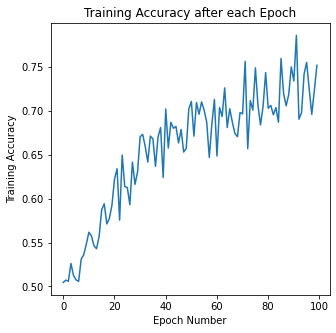

In [62]:
# plot the training accruacy
fig = plt.figure(figsize = (5,5))

plt.plot(range(I), train_acc)

plt.title('Training Accuracy after each Epoch')
plt.xlabel('Epoch Number')
plt.ylabel('Training Accuracy')
#plt.ylim((0.93,1))


plt.show()
fig.savefig('Training Accuracy versus epoch counter.png')

## Answer

The training accuracy goes to about $0.965$, which is very high, after the first epoch. Then it fluctuates around $0.935-0.975$. The trend seems not increasing as the number of epoch increases. Therefore, increasing or decreasing the maximum number of epoch will not affect the training accuracy too much.

## c

In [63]:
# run the function on the test set
test_acc = []
for w in weights:
    y_hat = np.matmul(X_test, w)
    test_acc.append(sum(Y_test * y_hat > 0) / len(X_test))
    


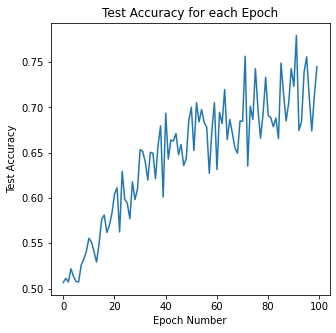

In [64]:
# plot the test accruacy
fig = plt.figure(figsize = (5,5))

plt.plot(range(I), test_acc)

plt.title('Test Accuracy for each Epoch')
plt.xlabel('Epoch Number')
plt.ylabel('Test Accuracy')
#plt.ylim((0.92,1))

plt.show()
fig.savefig('Test Accuracy versus epoch counter.png')

## Answer

The pattern of test accuracy is very similar to that of training accuracy. The test accuracy goes to about $0.96$ after the first epoch, then fluctuates around $0.93-0.965$. The trend seems not increasing in the number of epochs. Compare to the training accuracy, the test accuracy is, generally, a little bit lower.

## d

Write a function called `Balanced Winnow` .

In [15]:
def balance_winnow(x, y, I, eta):
    
    # a function that performs balanced winnow algorithm
    # inputs: data feature x (n * p), data label y (n * 1), 
    # number of maximum epoch I (scalar), parameter eta (scalar)
    # outputs: updated weights, training accuracy
    
    N ,p = x.shape
    train_acc = []
    weights = []
    
    # initialize weights
    w_p = np.zeros(p) + (1 / 2 * p)
    w_n = np.zeros(p) + (1 / 2 * p)
    
    for e in range(I):
        for i in range(N):
            if y[i] * (x[i,:].dot(w_p) - x[i,:].dot(w_n)) <= 0:
                w_p = w_p * np.exp(eta * y[i] * x[i,:])
                w_n = w_n * np.exp(-eta * y[i] * x[i,:])
                s = sum(w_n) + sum(w_p)
                w_p = w_p / s
                w_n = w_n / s
                
        train_acc.append(sum(y * np.matmul(x, w_p-w_n)>0 )/ N) 
        
        weights.append([w_p, w_n])
    
    
    return weights, train_acc

## e

Run the `Balanced Winnow` function on the training and test set.

In [51]:
eta = 0.1
w_I = 30

# train the balanced winnow alogrithm
w_weights, w_train_acc = balance_winnow(X_train, Y_train, w_I, eta)


In [52]:
# run the model on the test set
w_test_acc = []
for w in w_weights:
    pred = np.matmul(X_test, w[0]-w[1])
    w_test_acc.append(sum(Y_test * pred > 0)/len(X_test))

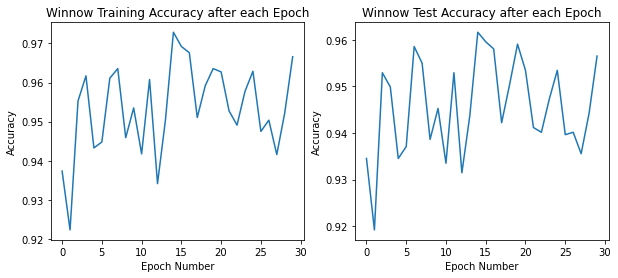

In [53]:
fig, axs = plt.subplots(1, 2, figsize = (10,4))

axs[0].plot(range(w_I), w_train_acc)
axs[1].plot(range(w_I) , w_test_acc)
axs[0].set_title('Winnow Training Accuracy after each Epoch')
axs[1].set_title('Winnow Test Accuracy after each Epoch')

for ax in axs.flat:
    ax.set(xlabel='Epoch Number', ylabel='Accuracy')
    
plt.show()
fig.savefig('Winnow Training and Test Accuracy versus epoch counter.png')

## Answer

From the plots we can see that the test accuracy fluctuates around $0.935-0.975$, and the test accuracy fluctuates around $0.920-0.965$. Both reached very high accuracy at the very first epoch. Thus we can say that the Winnow, in this case, converges very quickly, and reached a relatively stable state after the first epoch.